# **Project 1: enhancement + preprocessing + summarization**
## Subject: Artificial Vision

Ximena Vazquez Mellado Flores 171319

Juan Pablo Morales Durante 171657

Alejandro Sánchez González 167299


# **Part 2: Preprocessing the images for the classification**

In this first section, we want to imporve the visual aspect of our images applying a few enhancement filters and normalizing all of our images to be t

In [1]:
# Uploading the dataset from the local files
from google.colab import files
files.upload()

Saving clean_dataset.zip to clean_dataset.zip


In [2]:
# unpack clean data from dataset
import zipfile
with zipfile.ZipFile("/content/clean_dataset.zip", "r") as f:
  f.extractall("/content/clean_dataset")

In [3]:
# Installing the needed packages
!pip install rembg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.5 MB/s eta 0:00:00


In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
import random
import matplotlib.pyplot as plt
from rembg import remove          # background remover function
from PIL import Image             # converting images to remove background
from skimage import filters       # sobel edge detector
from skimage import feature as sk

In [7]:
#Preprocess filters needed
# Returns image in OpenCV format
def rm_background(image):

  # Processing the image from OpenCV to PIL
  img = cv2.imread(image)
  img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
  input = Image.fromarray(img)

  # Removing the background from the given Image
  output = remove(input)

  # Process image from PIL to OpenCV
  cv_image = cv2.cvtColor(np.array(output), cv2.COLOR_RGB2BGR)
  return cv_image

# filtros de preprocesamiento
def canny_edge(image):
  # -------
  # Apply the Canny edge detector to the Sobel filtered image
  img_canny = cv2.Canny(image, 50, 170)

  return img_canny

def median_blur(image):
  # ----------
  # Apply Median Filter
  img_bila = cv2.medianBlur(image, 3)
  return img_bila

def bilateral(image):
  # ----------
  # Apply Bilateral Filter
    img_bila = cv2.bilateralFilter(image, 15, 75, 75)
    return img_bila

def laplacian_blur(image):
  # -----------
  #Apply the Laplacian filter
  img_laplacian = cv2.Laplacian(image, cv2.CV_64F)
  img_laplacian = np.uint8(np.absolute(img_laplacian))
  return img_laplacian


In [8]:
# Normalizing the whole dataset and saving it on a new folder

felines = ["cheetahs_clean", "eurasian_lynx_clean", "leopards_clean", "lions_Clean",
           "mountain_lions_clean", "panthers_clean", "snow_leopards_clean", "tigers_clean"]

if "preprocessed" not in os.listdir("/content"):
  os.mkdir("preprocessed")
  for i in felines:
    os.mkdir(f"preprocessed/{i}")

# Loop every different feline folder
for folder in os.listdir("/content/clean_dataset/"):
  print(folder)
  # Loop every image in each folder
  for feline in os.listdir(f"/content/clean_dataset/{folder}"):
    # Save the processed image in the corresponding subfolder of the output directory
    output_image_path = os.path.join(f"/content/preprocessed/{folder}", feline)
    img = rm_background(f"/content/clean_dataset/{folder}/{feline}")
    img = median_blur(img)
    img = bilateral(img)
    img = canny_edge(img)
    img = laplacian_blur(img)
    cv2.imwrite(output_image_path, img)

print("Processing complete. Images saved in the output directory.")

leopards_clean
lions_Clean
tigers_clean
mountain_lions_clean
panthers_clean
eurasian_lynx_clean
cheetahs_clean
snow_leopards_clean
Processing complete. Images saved in the output directory.


In [ ]:
!zip -r /content/normalized.zip /content/normalized

	zip warning: name not matched: /content/normalized

zip error: Nothing to do! (try: zip -r /content/normalized.zip . -i /content/normalized)


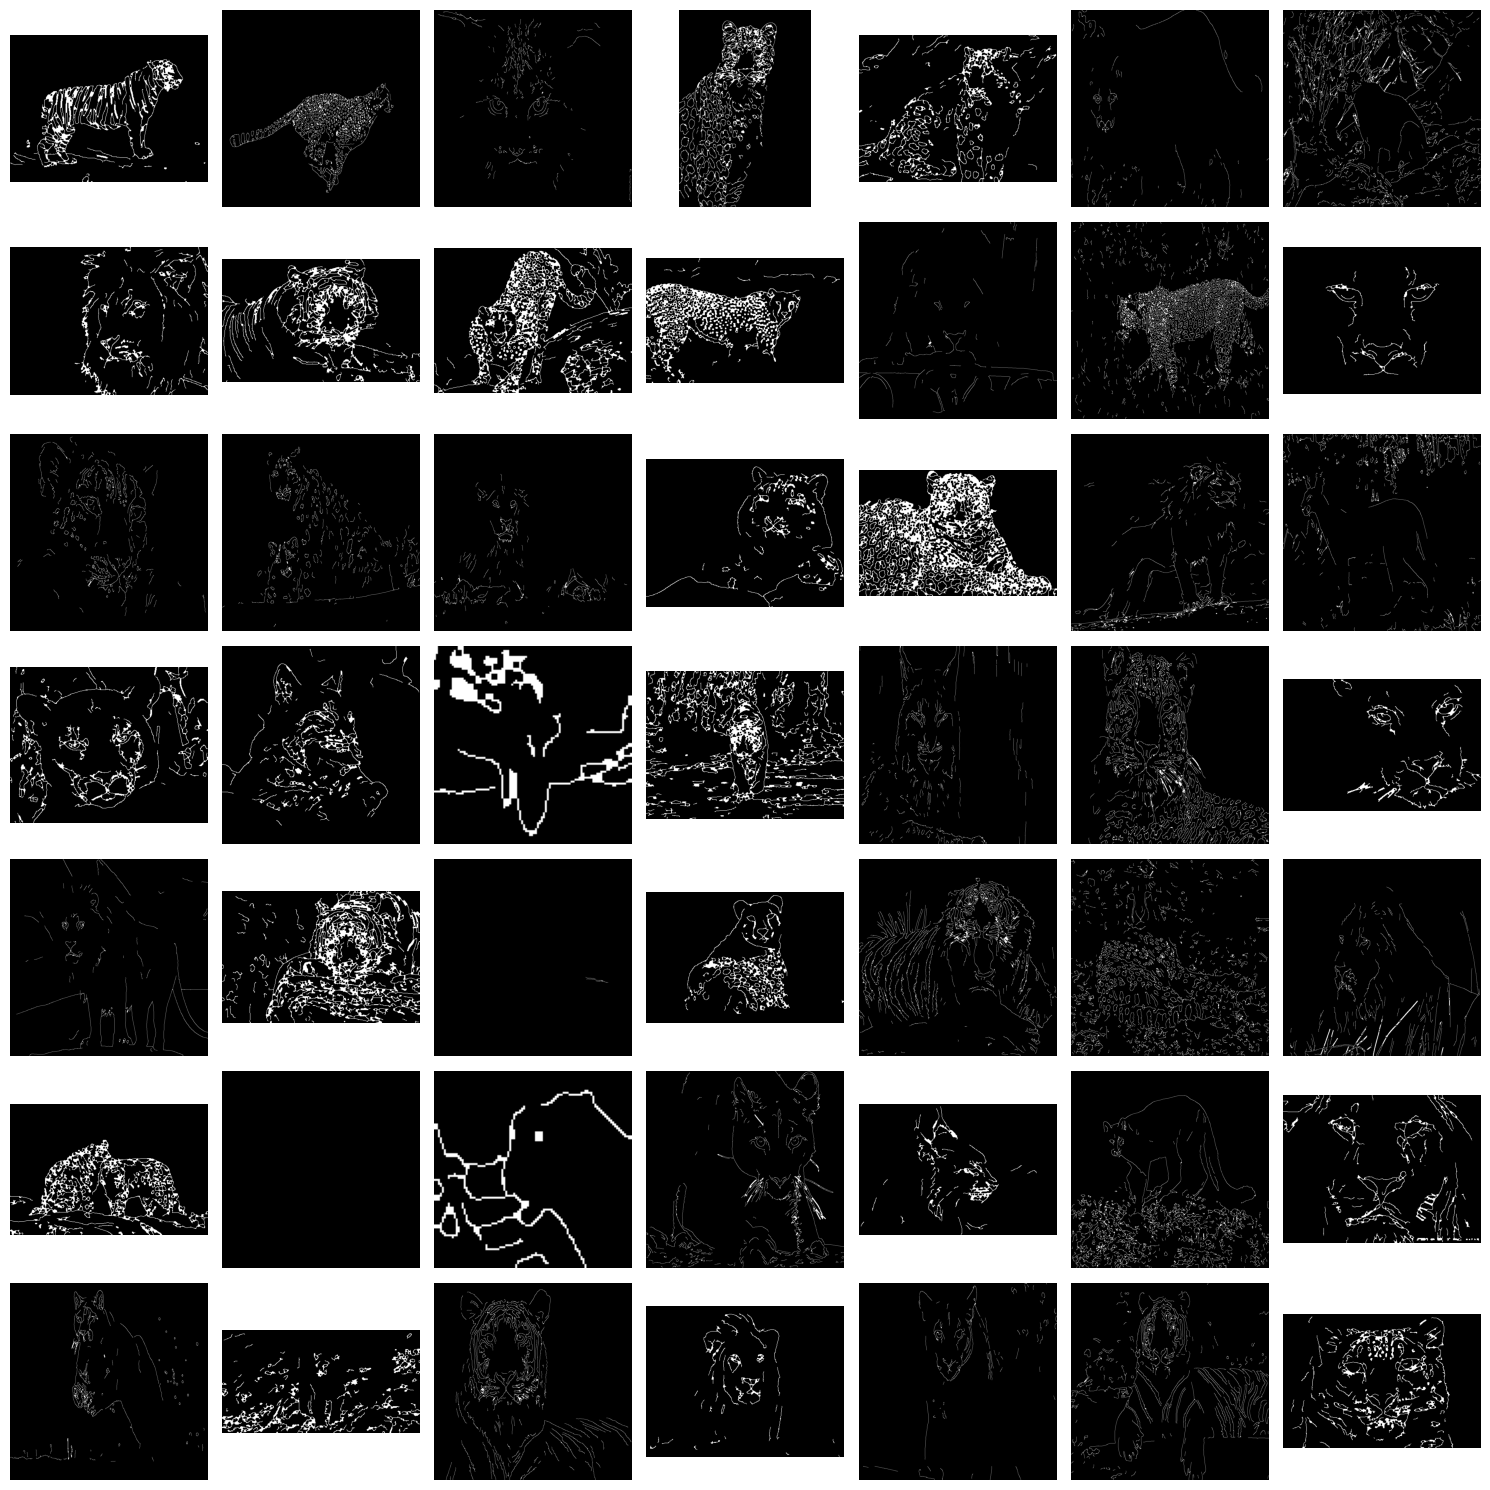

In [ ]:
plot_images(Preprocessed)